<a href="https://colab.research.google.com/github/RifqiMakarim/MachineLearning_Asah_Dicoding/blob/main/ML_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/FOR GO-COLAB/Dataset_HousePrice/train.csv')
print(train.info())

# Menampilkan statistik deskriptif dari dataset
print(train.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Pemeriksaan Missing Values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values:\n", missing_values)


Missing Values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Mengisi Missing Values bentuk numerik dengan median
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Mengisi Massing Values bentuk kategorikal dengan modus
categorical_features = train[less].select_dtypes(include=['object']).columns
for column in categorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])


In [ ]:
# Menghapus kolom dengan terlalu banyak missing values
df = train.drop(columns=over)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing Values after cleaning:\n", missing_values)

Missing Values after cleaning:
 Series([], dtype: int64)


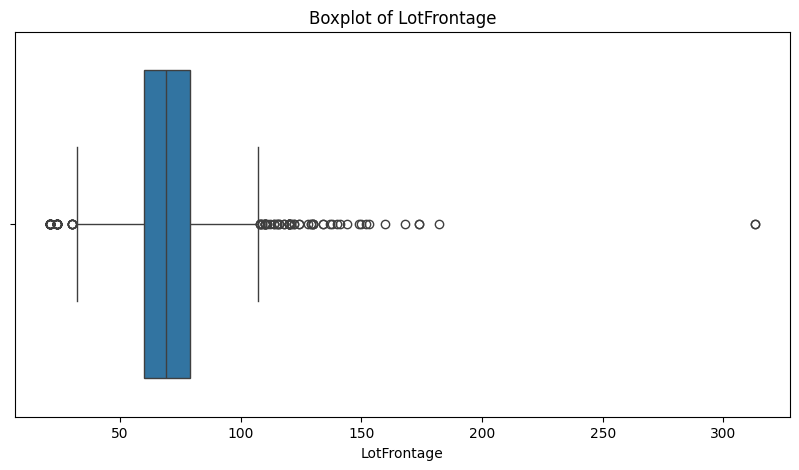

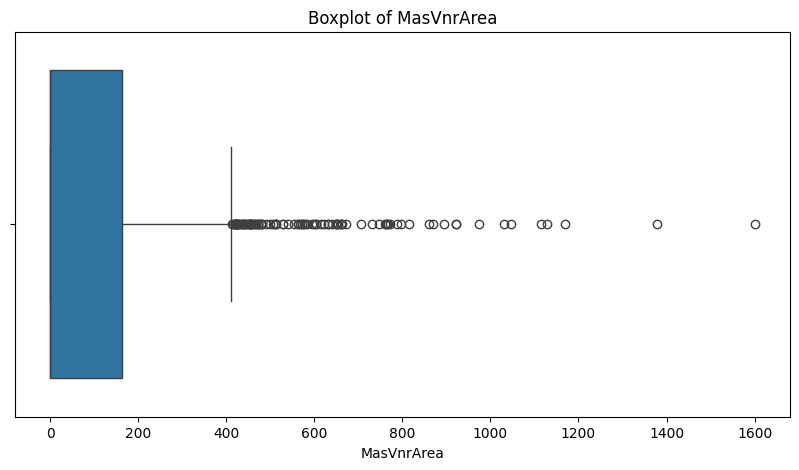

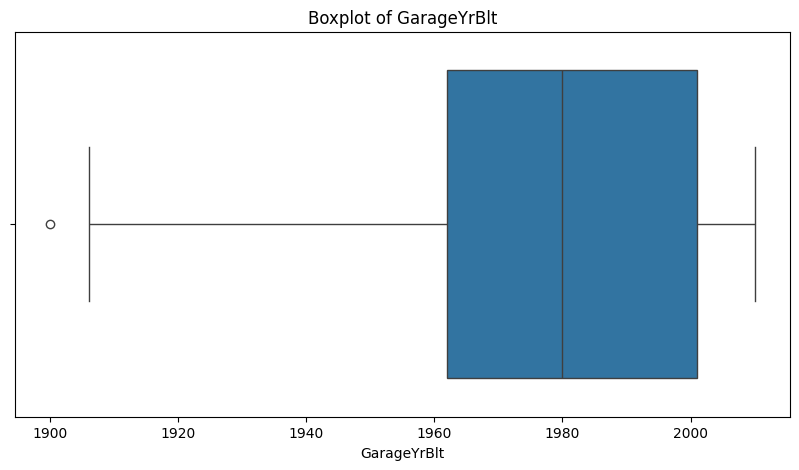

In [ ]:
# Outlier
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
# Filter data menggunakan metode IQR (Rentang percentil 1 dan 3)
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

In [ ]:
# Menggabungkan kembali dengan kolom kategorikal dan SalePrice
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features], df.loc[condition, 'SalePrice']], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1267 non-null   float64
 1   MasVnrArea     1267 non-null   float64
 2   GarageYrBlt    1267 non-null   float64
 3   MSZoning       1267 non-null   object 
 4   Street         1267 non-null   object 
 5   LotShape       1267 non-null   object 
 6   LandContour    1267 non-null   object 
 7   Utilities      1267 non-null   object 
 8   LotConfig      1267 non-null   object 
 9   LandSlope      1267 non-null   object 
 10  Neighborhood   1267 non-null   object 
 11  Condition1     1267 non-null   object 
 12  Condition2     1267 non-null   object 
 13  BldgType       1267 non-null   object 
 14  HouseStyle     1267 non-null   object 
 15  RoofStyle      1267 non-null   object 
 16  RoofMatl       1267 non-null   object 
 17  Exterior1st    1267 non-null   object 
 18  Exterior2nd  

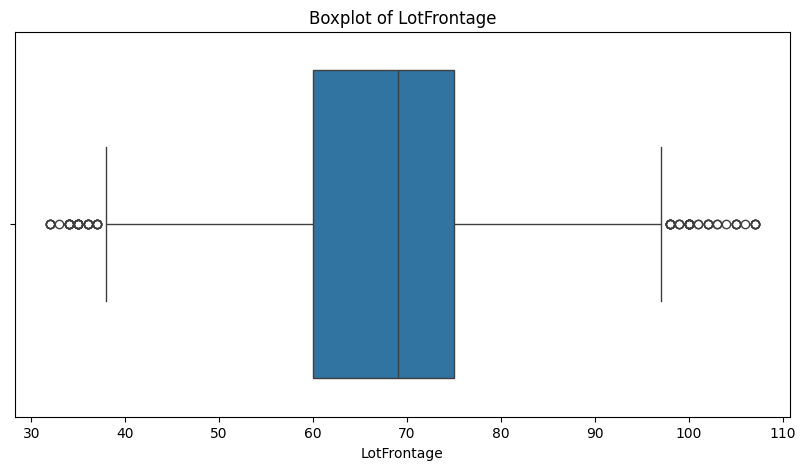

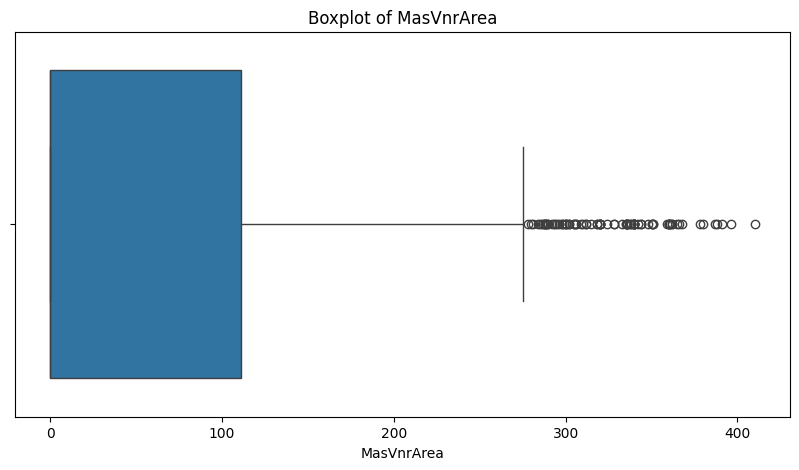

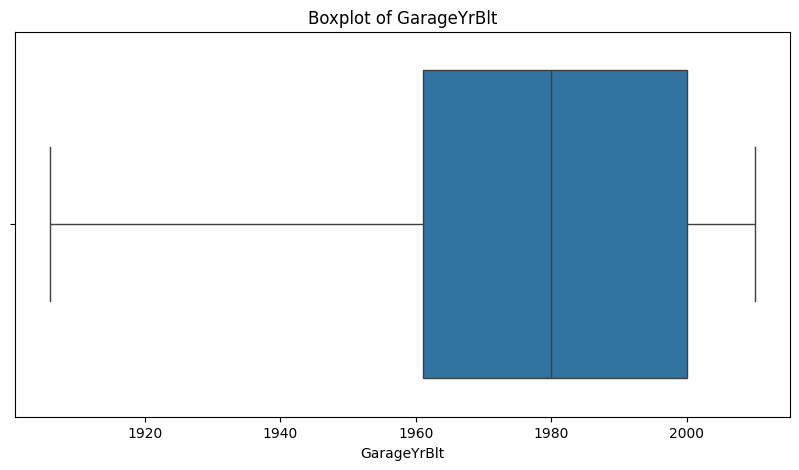

In [ ]:
# Hasil Outlier setelah filtering
for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [ ]:
# Standardisasi Fitur Numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

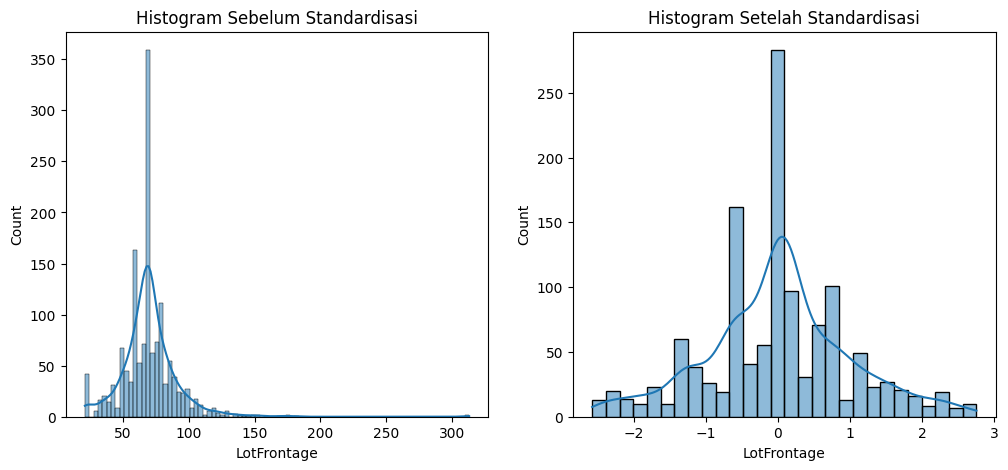

In [ ]:
# Histogram sebelum standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[0]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

# Histogram setelah standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[0]], kde=True)
plt.title("Histogram Setelah Standardisasi")
plt.show()

In [ ]:
# identifikasi duplikasi
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
print(df[duplicates])

df = df.drop_duplicates()
print("Dataframe setelah menghapus duplikasi:")
print(df)


Number of duplicate rows: 0
Empty DataFrame
Columns: [LotFrontage, MasVnrArea, GarageYrBlt, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 43 columns]
Dataframe setelah menghapus duplikasi:
      LotFrontage  MasVnrArea  GarageYrBlt MSZoning Street LotShape  \
0       -0.232523    1.267216     1.057175       RL   Pave      Reg   
1        0.835408   -0.619077    -0.056825       RL   Pave      Reg   
2       -0.018937    0.940002     0.974656       RL   Pave      IR1   
3       -0.588500   -0.619077     0.850879       RL   Pave      IR1   
4        1.1

Sebagian besar algoritma machine learning didasarkan pada operasi matematika yang melibatkan perhitungan jarak, gradien, atau distribusi data. Misalnya, regresi linier menghitung persamaan garis menggunakan koefisien yang diterapkan pada fitur numerik. Jika data inputan berupa kategori (seperti "merah," "biru," "hijau"), tidak ada cara langsung untuk memasukkan nilai kategori tersebut ke dalam perhitungan matematika.

In [ ]:
# melihat data kategorical
category_features = df.select_dtypes(include=['object']).columns
df[categorical_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
# Melakukna One Hot Encoding
df_one_hot = pd.get_dummies(df,columns=categorical_features)
df_one_hot

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.232523,1.267216,1.057175,208500,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0.835408,-0.619077,-0.056825,181500,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.018937,0.940002,0.974656,223500,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,-0.588500,-0.619077,0.850879,140000,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,False,False
4,1.120189,2.749303,0.933397,250000,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.446109,-0.619077,0.892138,175000,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,1.191385,0.526172,0.025693,210000,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,-0.161328,-0.619077,-1.500899,266500,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,-0.018937,-0.619077,-1.129566,142125,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [ ]:
# Label Encoding dengan Label encoder
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
  df_lencoder[col] = label_encoder.fit_transform(df[col])

# Menampilkan hasil
df_lencoder

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,-0.232523,1.267216,1.057175,3,1,3,3,0,4,0,...,6,2,1,1,4,4,2,8,4,208500
1,0.835408,-0.619077,-0.056825,3,1,3,3,0,2,0,...,6,4,1,1,4,4,2,8,4,181500
2,-0.018937,0.940002,0.974656,3,1,0,3,0,4,0,...,6,4,1,1,4,4,2,8,4,223500
3,-0.588500,-0.619077,0.850879,3,1,0,3,0,0,0,...,6,2,5,2,4,4,2,8,0,140000
4,1.120189,2.749303,0.933397,3,1,0,3,0,2,0,...,6,4,1,1,4,4,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.446109,-0.619077,0.892138,3,1,3,3,0,4,0,...,6,4,1,1,4,4,2,8,4,175000
1456,1.191385,0.526172,0.025693,3,1,3,3,0,4,0,...,2,4,1,2,4,4,2,8,4,210000
1457,-0.161328,-0.619077,-1.500899,3,1,3,3,0,4,0,...,6,2,1,1,4,4,2,8,4,266500
1458,-0.018937,-0.619077,-1.129566,3,1,3,3,0,4,0,...,6,2,1,2,4,4,2,8,4,142125


**One Hot Encoding**


*   Kelebihan
      1.   One-hot encoding tidak mengasumsikan adanya urutan atau hierarki di antara kategori, yang sangat cocok untuk data kategorikal nominal (misalnya, warna, jenis kelamin, dll.).

      2. Karena setiap kategori diubah menjadi kolom terpisah dengan nilai biner (0 atau 1), tidak ada risiko bahwa model akan memperlakukan satu kategori sebagai lebih besar atau lebih kecil daripada yang lain.

      3. Model yang sensitif terhadap skala numerik, seperti regresi linier, cenderung berfungsi lebih baik dengan one-hot encoding karena tidak ada hubungan numerik yang diciptakan antara kategori.

*   Kekurangan
      1.   One-hot encoding dapat menghasilkan DataFrame dengan dimensi yang sangat tinggi jika ada banyak kategori. Hal ini bisa menyebabkan masalah "curse of dimensionality," yang membuat model lebih lambat dan memerlukan lebih banyak memori.
      2. Hasil one-hot encoding sering kali menjadi sparse matrix, di mana sebagian besar nilainya adalah 0 atau False sehingga bisa memperlambat proses pelatihan.
      3. Untuk fitur yang memiliki ribuan kategori (misalnya, kode pos), one-hot encoding bisa menjadi tidak praktis karena akan menghasilkan ribuan kolom baru.







**Label Encoding**


*   Kelebihan
      1. Label encoding mudah diimplementasikan dan tidak menambah dimensi dataset karena setiap kategori diubah menjadi angka tunggal.
      2. Tidak seperti one-hot encoding, label encoding tidak meningkatkan jumlah kolom dalam dataset, yang membuatnya lebih hemat memori dan lebih cepat untuk diproses.
      3. Label encoding cocok untuk data kategorikal ordinal di mana ada urutan yang jelas antara kategori (misalnya, rendah, sedang, tinggi).

*   Kekurangan
      1. Label encoding mengasumsikan bahwa ada urutan atau hierarki antara kategori, yang tidak selalu sesuai dengan kenyataan untuk data nominal. Ini bisa menyebabkan model membuat kesimpulan yang salah karena satu kategori mungkin dianggap lebih besar atau lebih kecil dari yang lain.
      2. Jika digunakan pada data kategorikal nominal, label encoding dapat memperkenalkan bias ke dalam model karena model dapat salah menganggap bahwa ada hubungan numerik antara kategori yang sebenarnya setara.
      3. Label encoding kurang cocok untuk fitur dengan banyak kategori karena model bisa saja memberi terlalu banyak bobot pada satu kategori yang secara numerik lebih besar daripada yang lain.






In [ ]:
df_lencoder.head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,-0.232523,1.267216,1.057175,3,1,3,3,0,4,0,...,6,2,1,1,4,4,2,8,4,208500
1,0.835408,-0.619077,-0.056825,3,1,3,3,0,2,0,...,6,4,1,1,4,4,2,8,4,181500
2,-0.018937,0.940002,0.974656,3,1,0,3,0,4,0,...,6,4,1,1,4,4,2,8,4,223500
3,-0.588500,-0.619077,0.850879,3,1,0,3,0,0,0,...,6,2,5,2,4,4,2,8,0,140000
4,1.120189,2.749303,0.933397,3,1,0,3,0,2,0,...,6,4,1,1,4,4,2,8,4,250000


In [ ]:
# Menghitung jumlah dan persentase missing values
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Value' : missing_values,
    'Percenrage' : missing_percentage
}).sort_values(by='Missing Value',ascending = False)

missing_data[missing_data['Missing Value'] > 0 ]


,Missing Value,Percenrage


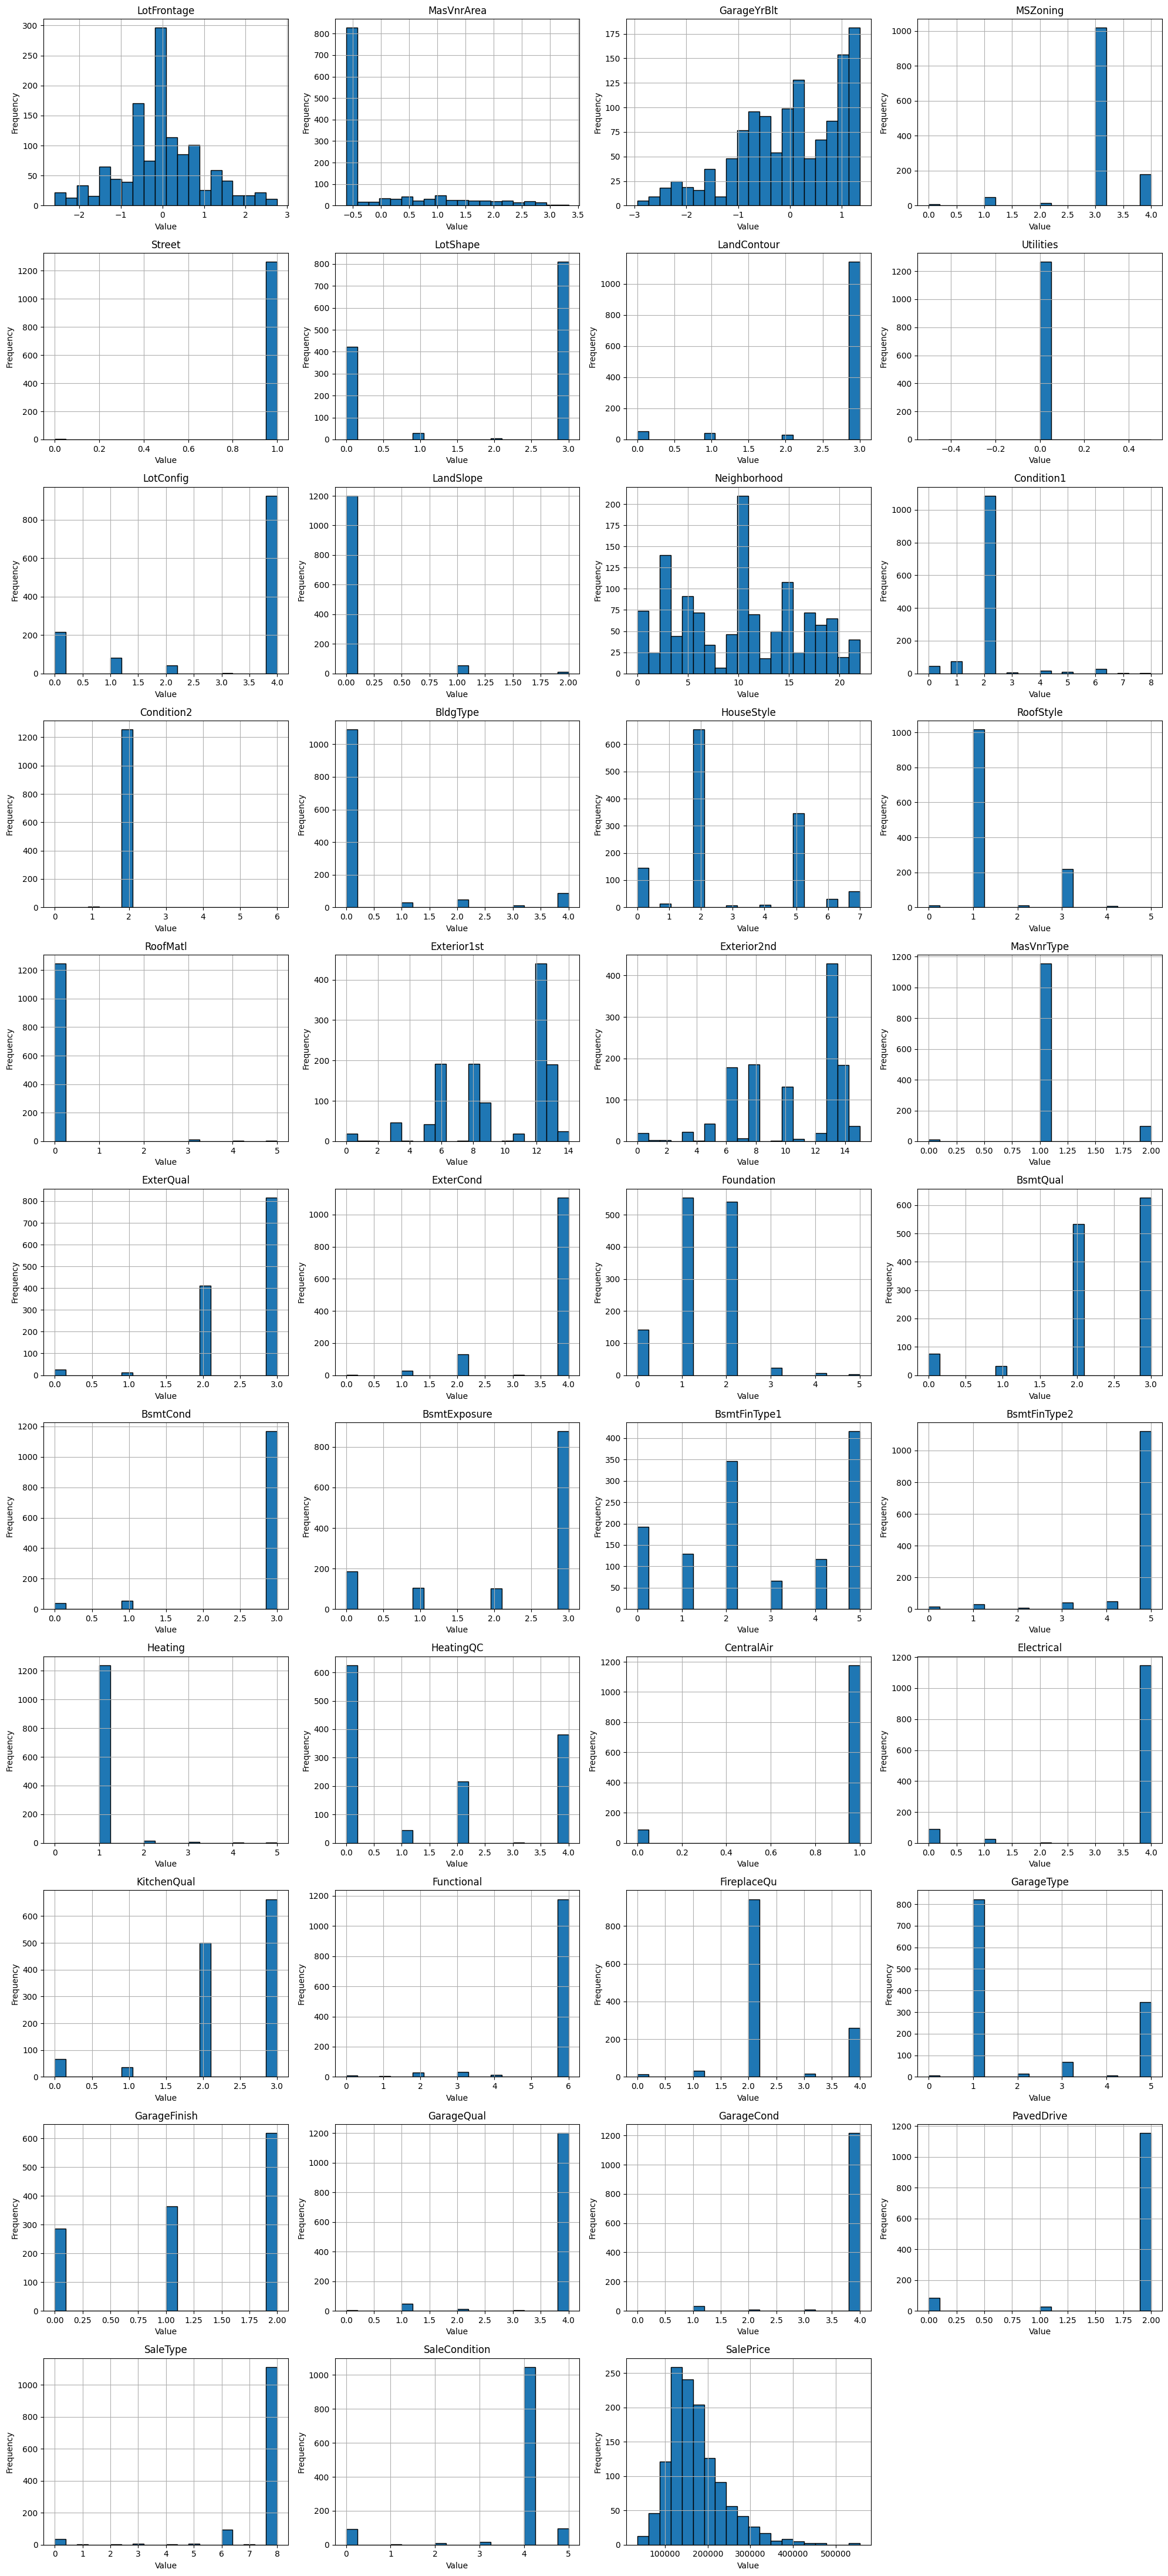

In [ ]:
# Menghitung jumlah variabel
num_vars = df_lencoder.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4
n_rows = - ( -num_vars // n_cols)

# membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df_lencoder.columns):
    df_lencoder[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range( i + 1 , len(axes)):
  fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()



⚠️ Kolom 'OverallQual' tidak ditemukan, dilewati.
⚠️ Kolom 'YearBuilt' tidak ditemukan, dilewati.
⚠️ Kolom 'LotArea' tidak ditemukan, dilewati.


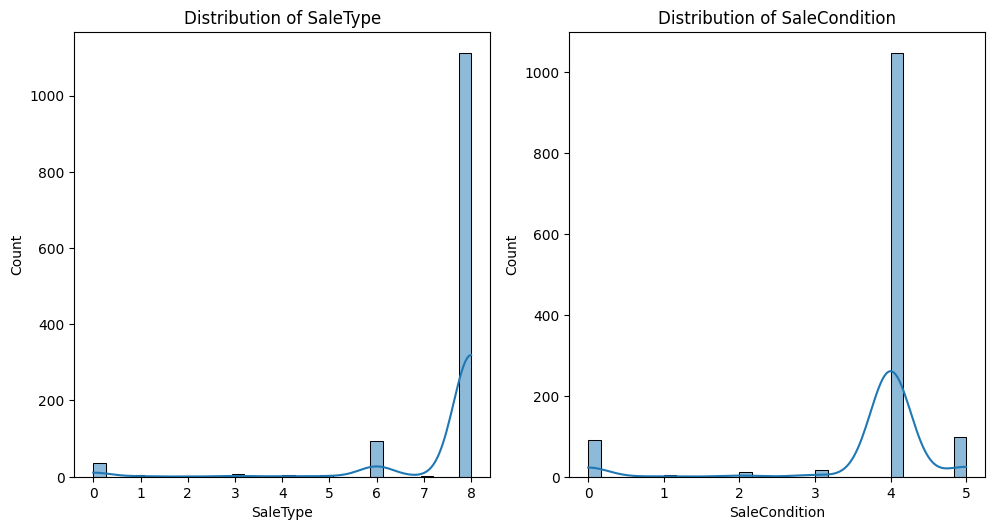

In [ ]:

columns_to_plot = ['OverallQual', 'YearBuilt', 'LotArea', 'SaleType', 'SaleCondition']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    if column not in df_lencoder.columns:
        print(f"⚠️ Kolom '{column}' tidak ditemukan, dilewati.")
        continue

    plt.subplot(2, 3, i)

    if pd.api.types.is_numeric_dtype(df_lencoder[column]):
        sns.histplot(df_lencoder[column], kde=True, bins=30)
    else:
        sns.countplot(x=df_lencoder[column])
        plt.xticks(rotation=45)

    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


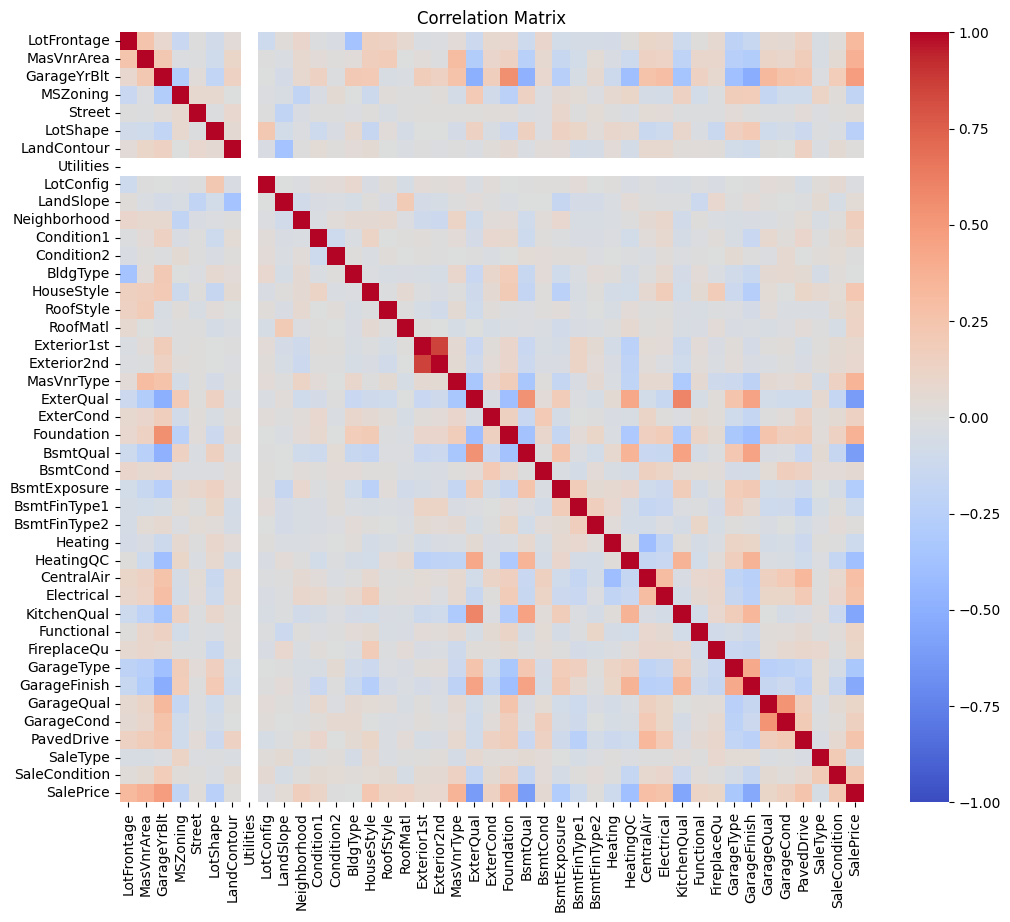

In [ ]:
# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

---
**Exploratory dan Explanatory Data Analysis**

In [ ]:
df_lencoder.head()

,LotFrontage,MasVnrArea,GarageYrBlt,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,-0.232523,1.267216,1.057175,3,1,3,3,0,4,0,...,6,2,1,1,4,4,2,8,4,208500
1,0.835408,-0.619077,-0.056825,3,1,3,3,0,2,0,...,6,4,1,1,4,4,2,8,4,181500
2,-0.018937,0.940002,0.974656,3,1,0,3,0,4,0,...,6,4,1,1,4,4,2,8,4,223500
3,-0.588500,-0.619077,0.850879,3,1,0,3,0,0,0,...,6,2,5,2,4,4,2,8,0,140000
4,1.120189,2.749303,0.933397,3,1,0,3,0,2,0,...,6,4,1,1,4,4,2,8,4,250000


In [ ]:


# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df_lencoder.isnull().sum()
missing_percentage = (missing_values / len(df_lencoder)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


Dengan memahami korelasi antar variabel, Anda dapat memilih fitur yang akan dimasukkan ke dalam model machine learning dengan lebih baik serta memahami dinamika data secara lebih mendalam.

In [ ]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df_lencoder.corr()['SalePrice']

# Mengurutkan hasil korelasi berdasarkan korelasi
target_corr_sorted = target_corr.sort_values(ascending=False)

# Menampilkan hasil
print(target_corr)

LotFrontage      0.317286
MasVnrArea       0.380660
GarageYrBlt      0.481892
MSZoning        -0.191225
Street           0.021747
LotShape        -0.239712
LandContour      0.010197
Utilities             NaN
LotConfig       -0.019318
LandSlope        0.046251
Neighborhood     0.170596
Condition1       0.109753
Condition2       0.002381
BldgType        -0.007524
HouseStyle       0.231433
RoofStyle        0.120213
RoofMatl         0.126729
Exterior1st      0.074893
Exterior2nd      0.079715
MasVnrType       0.356409
ExterQual       -0.614636
ExterCond        0.139114
Foundation       0.372788
BsmtQual        -0.604861
BsmtCond         0.059824
BsmtExposure    -0.282795
BsmtFinType1    -0.109781
BsmtFinType2     0.012548
Heating         -0.111024
HeatingQC       -0.389583
CentralAir       0.281922
Electrical       0.258655
KitchenQual     -0.559216
Functional       0.118956
FireplaceQu      0.105384
GarageType      -0.322702
GarageFinish    -0.538310
GarageQual       0.102772
GarageCond  

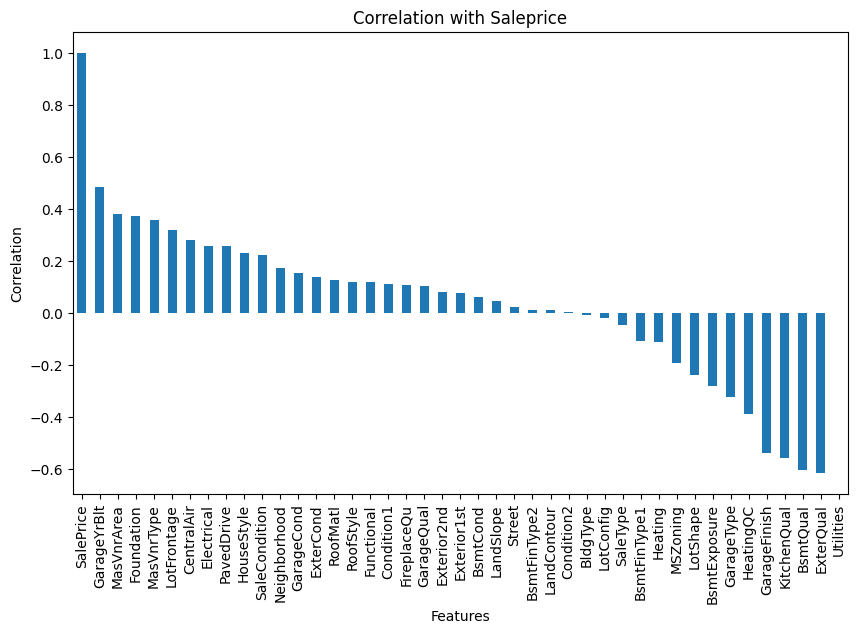

In [ ]:
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title('Correlation with Saleprice')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

Exploratory data analysis (EDA) dan explanatory data analysis (ExDA) adalah dua langkah penting dalam analisis data yang saling melengkapi. EDA bertujuan untuk memahami pola, anomali, dan struktur dalam data secara mendalam melalui visualisasi dan teknik statistik tanpa asumsi awal, sehingga membuka wawasan baru dan membantu membentuk hipotesis. Sebaliknya, ExDA fokus pada komunikasi temuan yang jelas dan meyakinkan, menggunakan visualisasi dan narasi yang efektif untuk menjelaskan dan mendukung argumen berdasarkan hasil analisis. Keduanya esensial untuk menghasilkan analisis yang valid dan dapat dimengerti oleh berbagai pemangku kepentingan (stakeholder).

----
**Data Splitting**

Data Splitting adalah proses membagi dataset menjadi beberapa subset yang terpisah untuk tujuan pelatihan, validasi, dan pengujian model machine learning.

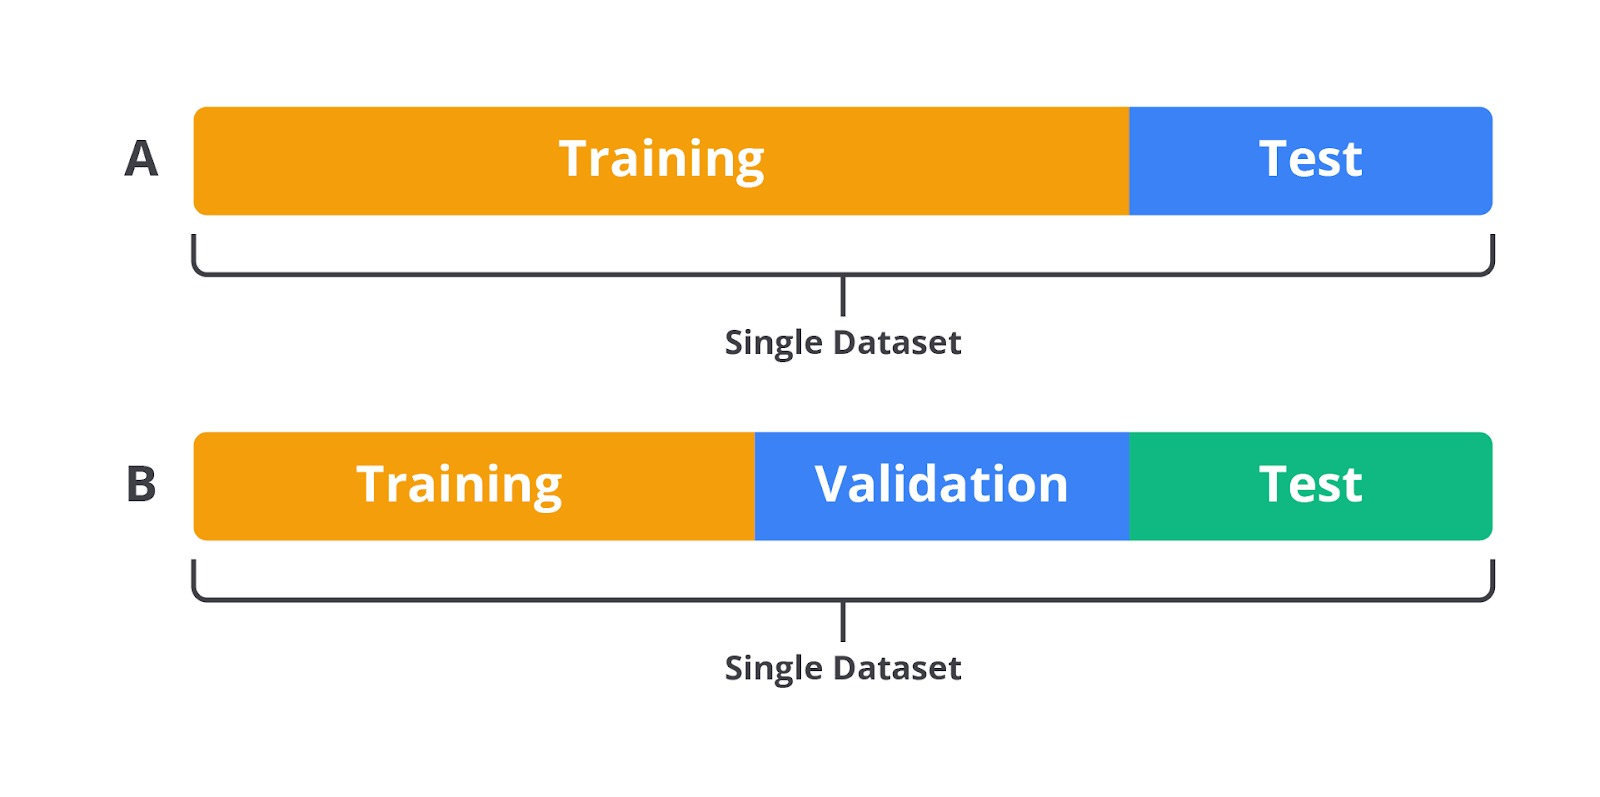

Rasio yang paling umum digunakan untuk data splitting adalah 70:30 atau 80:20, di mana 70-80% data digunakan untuk pelatihan (training) dan 20-30% sisanya digunakan untuk pengujian (testing). Alternatif lain yang sering digunakan adalah 60:20:20, di mana 60% data digunakan untuk pelatihan, 20% untuk validasi, dan 20% untuk pengujian.

In [ ]:
# Menggunakan Fungsi train test split ( holdout method )

# Memisahkan fitur (X) dan target (Y)
X = df_lencoder.drop(columns=['SalePrice'])
y = df_lencoder['SalePrice']

# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

**Selalu Gunakan random_state** : untuk memastikan hasil yang konsisten dan dapat direproduksi setiap kali Anda menjalankan kode Anda.
**Pertimbangkan Penggunaan stratify**: ini sangat penting jika Anda memiliki dataset dengan kelas yang tidak seimbang, karena memastikan bahwa setiap subset memiliki distribusi kelas yang sama.
**Evaluasi dengan Cross-Validation**: meskipun train_test_split memberikan cara sederhana untuk membagi data, cross-validation dapat memberikan evaluasi model yang lebih robust, terutama jika dataset Anda kecil.

In [ ]:
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_train
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  1267
Jumlah data latih:  1013
Jumlah data test:  254


----
**MODELLING**

In [ ]:
# Melatih model 1 dengan algoritma Least Angle Regression
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

# Melatih model 2 dengan algoritma Linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

# Melatih model 3 dengan algoritma Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

---
EVALUASI MODEL

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Evaluasi pada model LARS
pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': mae_lars,
    'MSE': mse_lars,
    'R2': r2_lars
}

# Konversi dictionary menjadi DataFrame
df_result = pd.DataFrame(data, index=['Lars'])
df_result


,MAE,MSE,R2
Lars,50738.645137,4.471144e+09,0.00389


In [ ]:
# Evaluasi pada model Linear Regression
pred_lR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_lR)
mse_LR = mean_squared_error(y_test, pred_lR)
r2_LR = r2_score(y_test, pred_lR)

df_result.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_result

,MAE,MSE,R2
Lars,50738.645137,4.471144e+09,0.003890
Linear Regression,25141.134674,1.292740e+09,0.711995


In [ ]:
# Evaluasi pada model Gradient Booting Regressor
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

df_result.loc['Gradient Boosting Regressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_result

,MAE,MSE,R2
Lars,50738.645137,4.471144e+09,0.003890
Linear Regression,25141.134674,1.292740e+09,0.711995
Gradient Boosting Regressor,21721.579737,9.666337e+08,0.784647


**Menyimpan Model**
Bisa menggunakan joblib atau Pickle

In [34]:
# 1. Joblib
from google.colab import drive
drive.mount('/content/drive')

import joblib
joblib.dump(GBR, '/content/drive/MyDrive/Model_ML/gbr_model.joblib')


# 2. Pickle

import pickle
with open('/content/drive/MyDrive/Model_ML/gbr_model.pkl', 'wb') as file:
    pickle.dump(GBR, file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Download di local
from google.colab import files
files.download('/content/drive/MyDrive/Model_ML/gbr_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Joblib lebih efisien dan cepat ketika bekerja dengan objek besar seperti model machine learning, sedangkan pickle lebih umum dan dapat digunakan untuk menyimpan berbagai jenis objek Python, tetapi kurang efisien dibandingkan joblib untuk model besar.**

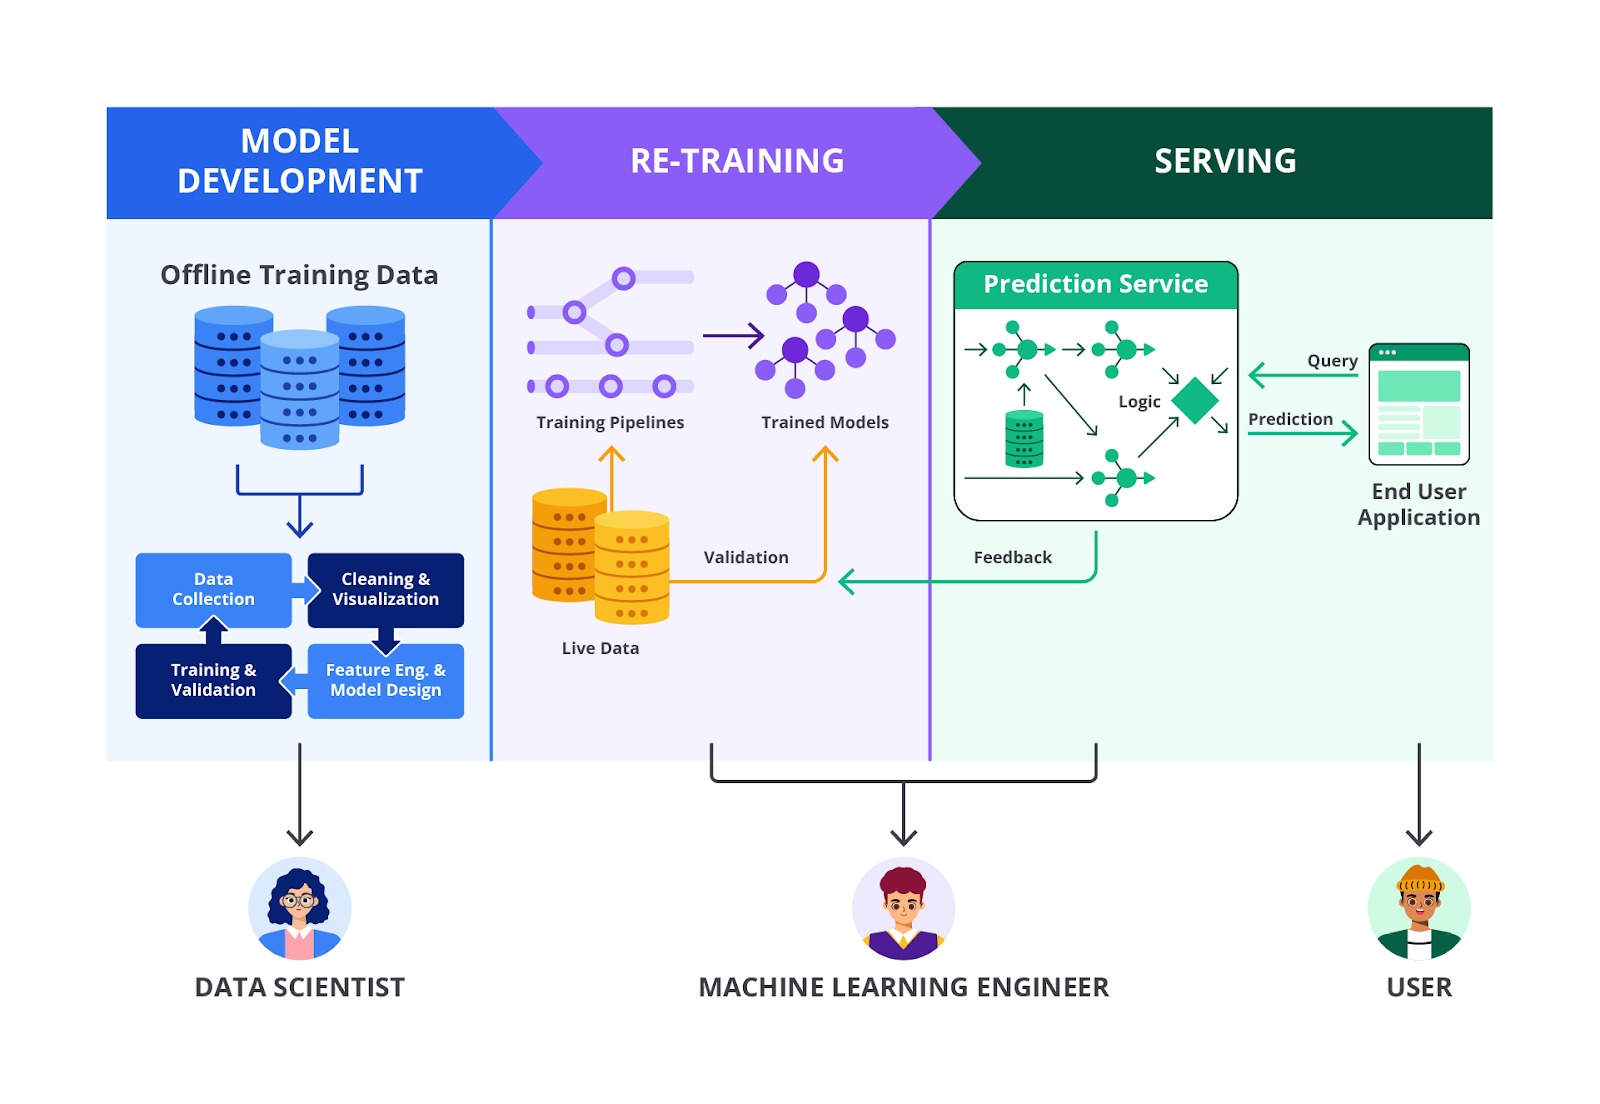

---
**DEPLOYMENT**

In [36]:
# Memuat model dari file joblib
joblib_model = joblib.load('/content/drive/MyDrive/Model_ML/gbr_model.joblib')

# Memuat model dari file pickle
with open('/content/drive/MyDrive/Model_ML/gbr_model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)
